In [96]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [97]:
os.chdir('C:/Users/Administrator/demand-forecasting/demand-forecasting/')
current_dir = os.getcwd()
print(current_dir)

C:\Users\Administrator\demand-forecasting\demand-forecasting


In [98]:
consolidation_states = ['CA', 'IL', 'NJ']
dfs=[]
for i in consolidation_states:
    df=pd.read_csv(f'data/{i}.csv')
    df=df.iloc[::-1]
    dfs.append(df)

In [99]:
wh = dfs[2]
wh

,YEAR_WEEK,COUNT(*),WEEK_NUMBER
160,202405,14400,162
159,202404,18082,161
158,202403,15636,160
157,202402,17190,159
156,202401,17902,158
...,...,...,...
4,202105,10911,6
3,202104,11824,5
2,202103,13840,4
1,202102,12218,3


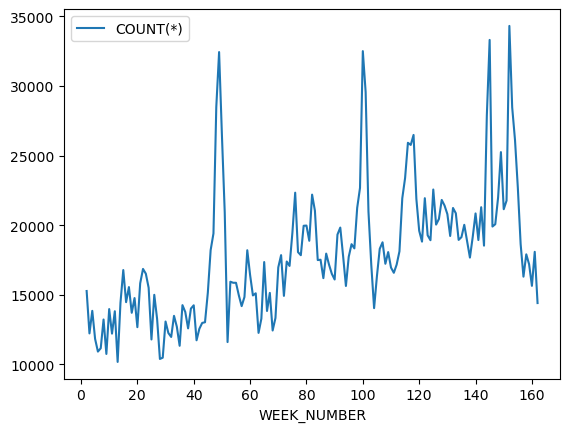

In [100]:
#dfs[1].sort_values(by='LABEL_PRINT_YEAR_WEEK_UTC', ascending = False)
wh.plot(kind='line', x='WEEK_NUMBER', y= 'COUNT(*)')
#plt.gca().invert_xaxis()
plt.show()

In [101]:
x_train,x_test,y_train,y_test = train_test_split(wh['WEEK_NUMBER'], wh['COUNT(*)'])


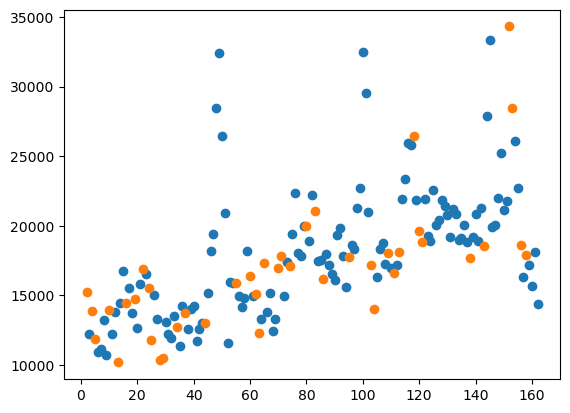

In [102]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.show()

In [103]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train.values)

LinearRegression()

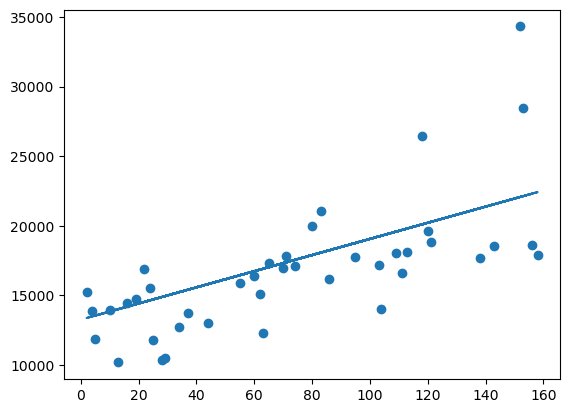

In [104]:
prediction = lr.predict(x_test.values.reshape(-1,1))
plt.plot(x_test,prediction)
plt.scatter(x_test,y_test)
plt.show()

In [105]:
lr.predict(np.array([[180]]))[0]

23688.30831265685

In [106]:
lr.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [75]:
lr.coef_

array([62.06413257])

In [76]:
lr.intercept_

12879.03439959991